## Importing libraries, setting up Spark

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [ ]:
#to install:
#$ pip install -U textblob
#$ python -m textblob.download_corpora
#pip install -U textblob textblob-aptagger

#if issue with tagger.py (importerror with packages) https://github.com/sloria/textblob-aptagger/issues/6

In [2]:
import findspark
findspark.init()
print findspark.find()

/usr/local/opt/apache-spark/libexec


In [3]:
import pyspark
conf = (pyspark.SparkConf()
    .setMaster('local')
    .setAppName('pyspark')
    .set("spark.executor.memory", "2g"))
sc = pyspark.SparkContext(conf=conf)

In [4]:
import sys
rdd = sc.parallelize(xrange(10),10)
rdd.map(lambda x: sys.version).collect()

['2.7.10 |Anaconda 2.3.0 (x86_64)| (default, Oct 19 2015, 18:31:17) \n[GCC 4.2.1 (Apple Inc. build 5577)]',
 '2.7.10 |Anaconda 2.3.0 (x86_64)| (default, Oct 19 2015, 18:31:17) \n[GCC 4.2.1 (Apple Inc. build 5577)]',
 '2.7.10 |Anaconda 2.3.0 (x86_64)| (default, Oct 19 2015, 18:31:17) \n[GCC 4.2.1 (Apple Inc. build 5577)]',
 '2.7.10 |Anaconda 2.3.0 (x86_64)| (default, Oct 19 2015, 18:31:17) \n[GCC 4.2.1 (Apple Inc. build 5577)]',
 '2.7.10 |Anaconda 2.3.0 (x86_64)| (default, Oct 19 2015, 18:31:17) \n[GCC 4.2.1 (Apple Inc. build 5577)]',
 '2.7.10 |Anaconda 2.3.0 (x86_64)| (default, Oct 19 2015, 18:31:17) \n[GCC 4.2.1 (Apple Inc. build 5577)]',
 '2.7.10 |Anaconda 2.3.0 (x86_64)| (default, Oct 19 2015, 18:31:17) \n[GCC 4.2.1 (Apple Inc. build 5577)]',
 '2.7.10 |Anaconda 2.3.0 (x86_64)| (default, Oct 19 2015, 18:31:17) \n[GCC 4.2.1 (Apple Inc. build 5577)]',
 '2.7.10 |Anaconda 2.3.0 (x86_64)| (default, Oct 19 2015, 18:31:17) \n[GCC 4.2.1 (Apple Inc. build 5577)]',
 '2.7.10 |Anaconda 2.3.0 (x8

In [5]:
sys.version

'2.7.10 |Anaconda 2.3.0 (x86_64)| (default, Oct 19 2015, 18:31:17) \n[GCC 4.2.1 (Apple Inc. build 5577)]'

In [6]:
from pyspark.sql import SQLContext
sqlsc=SQLContext(sc)

## Reading in the data, dropping duplicates, setting up dataframes by decade

In [73]:
df = pd.read_csv("/Users/Luke/Documents/cs109/project/total.csv", encoding="iso-8859-1")

In [69]:
df1966 = pd.read_csv("/Users/Luke/Documents/cs109/project/1966-1975.csv", encoding="iso-8859-1")
df1976 = pd.read_csv("/Users/Luke/Documents/cs109/project/1976-1985.csv", encoding="iso-8859-1")
df1986 = pd.read_csv("/Users/Luke/Documents/cs109/project/1986-1995.csv", encoding="iso-8859-1")
df1996 = pd.read_csv("/Users/Luke/Documents/cs109/project/1996-2005.csv", encoding="iso-8859-1")
df2006 = pd.read_csv("/Users/Luke/Documents/cs109/project/2006-2015.csv", encoding="iso-8859-1")

/Users/Luke/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [70]:
# change date dtype
df['date'] = pd.to_datetime(df['date'])
df1966['date'] = pd.to_datetime(df1966['date'])
df1976['date'] = pd.to_datetime(df1976['date'])
df1986['date'] = pd.to_datetime(df1986['date'])
df1996['date'] = pd.to_datetime(df1996['date'])
df2006['date'] = pd.to_datetime(df2006['date'])

In [74]:
# delete old index column from csv read
df = df.drop('Unnamed: 0', 1)
df1966 = df1966.drop('Unnamed: 0', 1)
df1976 = df1976.drop('Unnamed: 0', 1)
df1986 = df1986.drop('Unnamed: 0', 1)
df1996 = df1996.drop('Unnamed: 0', 1)
df2006 = df2006.drop('Unnamed: 0', 1)

In [58]:
df.dtypes

abstract              object
date          datetime64[ns]
doctype               object
headline              object
id                    object
news_desk             object
paragraph             object
section               object
subsection            object
text                  object
type                  object
dtype: object

In [76]:
print df.shape, df1966.shape, df1976.shape, df1986.shape, df1996.shape, df2006.shape

(403259, 11) (50327, 11) (60687, 11) (67622, 11) (79921, 11) (144702, 11)


In [77]:
# subset by articles
df = df[df['doctype']=='article']
df1966 = df1966[df1966['doctype']=='article']
df1976 = df1976[df1976['doctype']=='article']
df1986 = df1986[df1986['doctype']=='article']
df1996 = df1996[df1996['doctype']=='article']
df2006 = df2006[df2006['doctype']=='article']

In [78]:
print df.shape, df1966.shape, df1976.shape, df1986.shape, df1996.shape, df2006.shape

(369890, 11) (50327, 11) (60686, 11) (67605, 11) (79298, 11) (111974, 11)


In [79]:
# drop duplicates
df['dupcheck'] = df['paragraph'].str[0:50]
df = df.drop_duplicates('dupcheck')
df1966['dupcheck'] = df1966['paragraph'].str[0:50]
df1966 = df1966.drop_duplicates('dupcheck')
df1976['dupcheck'] = df1976['paragraph'].str[0:50]
df1976 = df1976.drop_duplicates('dupcheck')
df1986['dupcheck'] = df1986['paragraph'].str[0:50]
df1986 = df1986.drop_duplicates('dupcheck')
df1996['dupcheck'] = df1996['paragraph'].str[0:50]
df1996 = df1996.drop_duplicates('dupcheck')
df2006['dupcheck'] = df2006['paragraph'].str[0:50]
df2006 = df2006.drop_duplicates('dupcheck')

In [80]:
print df.shape, df1966.shape, df1976.shape, df1986.shape, df1996.shape, df2006.shape

(332395, 12) (39539, 12) (50063, 12) (63502, 12) (76823, 12) (102971, 12)


In [83]:
df1971 = df1966[df1966['date'] >= pd.to_datetime('1971-1-1')] # 1971-1976
df1966 = df1966[df1966['date'] < pd.to_datetime('1971-1-1')]  # 1966-1971
df1981 = df1976[df1976['date'] >= pd.to_datetime('1981-1-1')] # 1981-1986
df1976 = df1976[df1976['date'] < pd.to_datetime('1981-1-1')]  # 1976-1981
df1991 = df1986[df1986['date'] >= pd.to_datetime('1991-1-1')] # 1991-1996
df1986 = df1986[df1986['date'] < pd.to_datetime('1991-1-1')]  # 1986-1991
df2001 = df1996[df1996['date'] >= pd.to_datetime('2001-1-1')] # 2001-2006
df1996 = df1996[df1996['date'] < pd.to_datetime('2001-1-1')]  # 1996-2001
df2011 = df2006[df2006['date'] >= pd.to_datetime('2011-1-1')] # 2011-OCT2015
df2006 = df2006[df2006['date'] < pd.to_datetime('2011-1-1')]  # 2006-2011

In [84]:
print df.shape
print df1966.shape, df1971.shape, df1976.shape, df1981.shape, df1986.shape
print df1991.shape, df1996.shape, df2001.shape, df2006.shape, df2011.shape

(332395, 12)
(17408, 12) (22131, 12) (22590, 12) (27473, 12) (28876, 12)
(34626, 12) (35778, 12) (41045, 12) (45018, 12) (57953, 12)


## Importing textblob, nltk

In [12]:
from textblob import TextBlob as tb
from textblob_aptagger import PerceptronTagger
from textblob import Blobber


In [16]:
import nltk
from nltk.tokenize import TreebankWordTokenizer #token
from nltk.corpus import stopwords #stopwords
from nltk.stem import WordNetLemmatizer #lemma

In [18]:
#The necessary NLTK packages need to be downloaded to implement some of the functions. RUN ONLY ONCE
#nltk.download()

showing info http://www.nltk.org/nltk_data/


True

## Textblob parser

In [19]:
tb = Blobber(pos_tagger=PerceptronTagger())

In [110]:
def get_parts(thetext):
    nouns=[]
    tagged = tb(thetext).tags # a list of tuples
    for tup in tagged:
        w, tag = tup  
        if tag in ['NN', 'NNS', 'NNP', 'NNPS']:
            word = w.lemmatize().lower()
            if word[-1] in punctuation : 
                word = word[:-1]
            if word in stops or word in punctuation or len(word)==1 :
                continue
            nouns.append(word)
    nouns2=[]
    for n in nouns:
        if len(n)!=0:
            nouns2.append(n)
    return nouns2

In [21]:
from nltk.corpus import stopwords #stopwords
stops = stopwords.words('english')
stops.append(u'health')
punctuation = list('.,;:!?()[]{}`''\"@#$^&*+-|=~_')

In [111]:
%%time

parseout1966 = []
for index, row in df1966.iterrows() : 
    parseout1966.append(get_parts(row.text))

CPU times: user 2min 27s, sys: 4.01 s, total: 2min 31s
Wall time: 2min 32s


In [ ]:
# fixing len(noun)==0 cases after the fact
for document in parseout1966:
    for noun in document:
        if len(noun)==0:
            document.remove(noun)

In [86]:
%%time

parseout1971 = []
for index, row in df1971.iterrows() : 
    parseout1971.append(get_parts(row.text))

CPU times: user 4min 24s, sys: 1.63 s, total: 4min 25s
Wall time: 4min 26s


In [114]:
for document in parseout1971:
    for noun in document:
        if len(noun)==0:
            document.remove(noun)

In [87]:
%%time

parseout1976 = []
for index, row in df1976.iterrows() : 
    parseout1976.append(get_parts(row.text))

CPU times: user 3min 45s, sys: 1.47 s, total: 3min 47s
Wall time: 3min 47s


In [115]:
for document in parseout1976:
    for noun in document:
        if len(noun)==0:
            document.remove(noun)

In [88]:
%%time

parseout1981 = []
for index, row in df1981.iterrows() : 
    parseout1981.append(get_parts(row.text))

CPU times: user 5min 7s, sys: 2.88 s, total: 5min 10s
Wall time: 5min 11s


In [116]:
for document in parseout1981:
    for noun in document:
        if len(noun)==0:
            document.remove(noun)

In [89]:
%%time

parseout1986 = []
for index, row in df1986.iterrows() : 
    parseout1986.append(get_parts(row.text))

CPU times: user 3min 17s, sys: 2.22 s, total: 3min 19s
Wall time: 3min 19s


In [117]:
for document in parseout1986:
    for noun in document:
        if len(noun)==0:
            document.remove(noun)

In [90]:
%%time

parseout1991 = []
for index, row in df1991.iterrows() : 
    parseout1991.append(get_parts(row.text))

CPU times: user 6min 24s, sys: 3.31 s, total: 6min 27s
Wall time: 6min 28s


In [118]:
for document in parseout1991:
    for noun in document:
        if len(noun)==0:
            document.remove(noun)

In [91]:
%%time

parseout1996 = []
for index, row in df1996.iterrows() : 
    parseout1996.append(get_parts(row.text))

CPU times: user 9min 35s, sys: 6.35 s, total: 9min 41s
Wall time: 9min 44s


In [119]:
for document in parseout1996:
    for noun in document:
        if len(noun)==0:
            document.remove(noun)

In [92]:
%%time

parseout2001 = []
for index, row in df2001.iterrows() : 
    parseout2001.append(get_parts(row.text))

CPU times: user 11min 56s, sys: 12.7 s, total: 12min 9s
Wall time: 12min 16s


In [120]:
for document in parseout2001:
    for noun in document:
        if len(noun)==0:
            document.remove(noun)

In [93]:
%%time

parseout2006 = []
for index, row in df2006.iterrows() : 
    parseout2006.append(get_parts(row.text))

CPU times: user 5min 4s, sys: 8.25 s, total: 5min 12s
Wall time: 5min 16s


In [121]:
for document in parseout2006:
    for noun in document:
        if len(noun)==0:
            document.remove(noun)

In [94]:
%%time

parseout2011 = []
for index, row in df2011.iterrows() : 
    parseout2011.append(get_parts(row.text))

CPU times: user 6min 39s, sys: 4.04 s, total: 6min 43s
Wall time: 6min 46s


In [122]:
for document in parseout2011:
    for noun in document:
        if len(noun)==0:
            document.remove(noun)

## Saving parseout lists to txt files

In [123]:
import json

In [124]:
# saving parseout to txt file
with open("parseout1966.txt", 'w') as f:
    json.dump(parseout1966,f)

In [125]:
# checking accuracy of saved txt file
with open("parseout1966.txt", 'r') as f:
    parseout1966 = json.load(f)

In [126]:
parseout1966[:3]

[[u'u.s',
  u'aide',
  u'predicts',
  u'insurance',
  u'washington',
  u'jan',
  u'upi',
  u'surgeon',
  u'general',
  u'public',
  u'service',
  u'dr',
  u'jesse',
  u'steinfeld',
  u'country',
  u'insurance',
  u'program',
  u'federal',
  u'government',
  u'pilot',
  u'project',
  u'phs',
  u'surgeon',
  u'gen',
  u'dr',
  u'steinfeld',
  u'country',
  u'program',
  u'fed',
  u'govt',
  u'pilot',
  u'project',
  u'sen',
  u'com',
  u'query'],
 [u'project',
  u'negroes',
  u'studies',
  u'medicine',
  u'national',
  u'conference',
  u'black',
  u'students',
  u'medicine',
  u'week',
  u'establishment',
  u'clearinghouse',
  u'school',
  u'application',
  u'student',
  u'natl',
  u'conf',
  u'black',
  u'students',
  u'med',
  u'ccny',
  u'black',
  u'science',
  u'students',
  u'orgn',
  u'clearing',
  u'house',
  u'school',
  u'application',
  u'student',
  u'hampton',
  u'memorial',
  u'fund',
  u'slain',
  u'black',
  u'panther',
  u'leader',
  u'student',
  u'career'],
 [u'complai

In [127]:
with open("parseout1971.txt", 'w') as f:
    json.dump(parseout1971,f)

In [128]:
with open("parseout1976.txt", 'w') as f:
    json.dump(parseout1976,f)

In [129]:
with open("parseout1981.txt", 'w') as f:
    json.dump(parseout1981,f)

In [130]:
with open("parseout1986.txt", 'w') as f:
    json.dump(parseout1986,f)

In [131]:
with open("parseout1991.txt", 'w') as f:
    json.dump(parseout1991,f)

In [132]:
with open("parseout1996.txt", 'w') as f:
    json.dump(parseout1996,f)

In [133]:
with open("parseout2001.txt", 'w') as f:
    json.dump(parseout2001,f)

In [134]:
with open("parseout2006.txt", 'w') as f:
    json.dump(parseout2006,f)

In [135]:
with open("parseout2011.txt", 'w') as f:
    json.dump(parseout2011,f)

## Wordclouds

The following was taken from https://github.com/amueller/word_cloud. 

First install wordcloud package with the line `pip install wordcloud` in the terminal. 

In [137]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS

In [160]:
# read the mask image taken from http://static01.nyt.com/images/icons/t_logo_291_black.png
nyt_mask = np.array(Image.open("/Users/Luke/Documents/cs109/project/nyt_mask_2.png"))

In [161]:
wc = WordCloud(background_color="white", max_words=2000, mask=nyt_mask,
               stopwords=STOPWORDS)

In [167]:
# create single string of all text for each parseout list
import itertools
document1966 = list(itertools.chain.from_iterable(parseout1966))
document1966 = ' '.join(document1966)
document1971 = list(itertools.chain.from_iterable(parseout1971))
document1971 = ' '.join(document1971)
document1976 = list(itertools.chain.from_iterable(parseout1976))
document1976 = ' '.join(document1976)
document1981 = list(itertools.chain.from_iterable(parseout1981))
document1981 = ' '.join(document1981)
document1986 = list(itertools.chain.from_iterable(parseout1986))
document1986 = ' '.join(document1986)
document1991 = list(itertools.chain.from_iterable(parseout1991))
document1991 = ' '.join(document1991)
document1996 = list(itertools.chain.from_iterable(parseout1996))
document1996 = ' '.join(document1996)
document2001 = list(itertools.chain.from_iterable(parseout2001))
document2001 = ' '.join(document2001)
document2006 = list(itertools.chain.from_iterable(parseout2006))
document2006 = ' '.join(document2006)
document2011 = list(itertools.chain.from_iterable(parseout2011))
document2011 = ' '.join(document2011)

In [163]:
# generate word cloud
wc.generate(document1966)

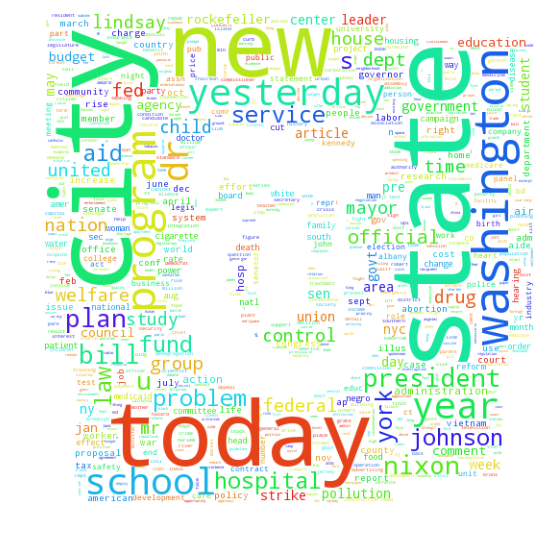

In [165]:
# show
plt.imshow(wc)
plt.axis("off")
plt.figure()
#plt.imshow(nyt_mask, cmap=plt.cm.gray)
#plt.axis("off")
plt.show()

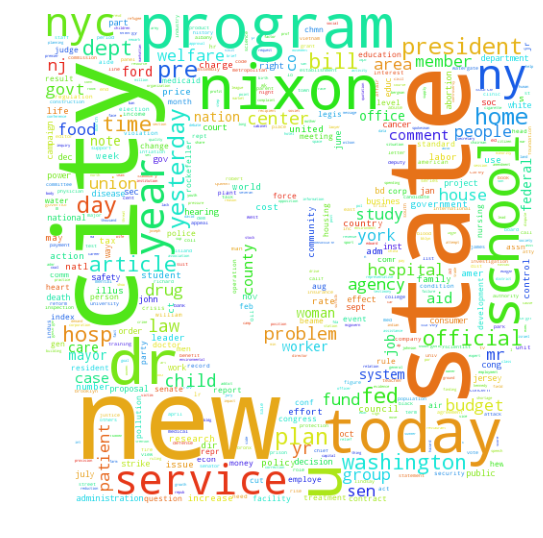

In [168]:
wc.generate(document1971)

plt.imshow(wc)
plt.axis("off")
plt.figure()
plt.show()

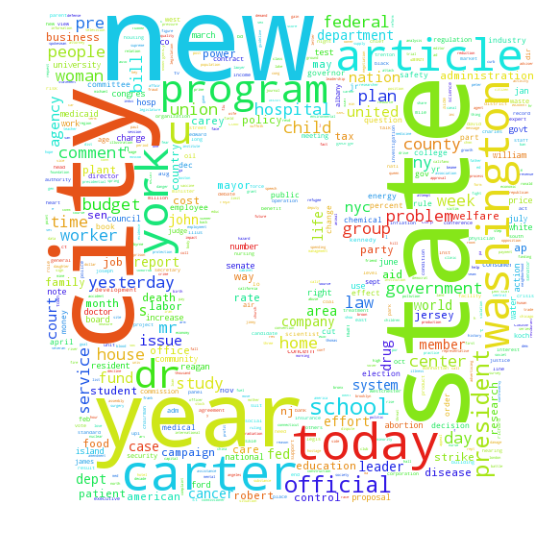

In [169]:
wc.generate(document1976)

plt.imshow(wc)
plt.axis("off")
plt.figure()
plt.show()

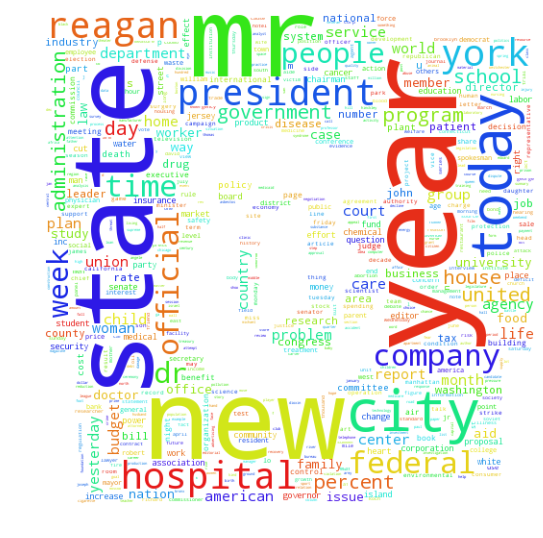

In [170]:
wc.generate(document1981)

plt.imshow(wc)
plt.axis("off")
plt.figure()
plt.show()

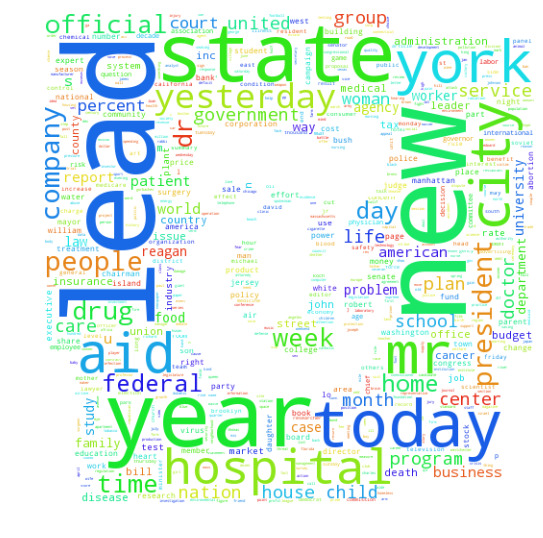

In [171]:
wc.generate(document1986)

plt.imshow(wc)
plt.axis("off")
plt.figure()
plt.show()

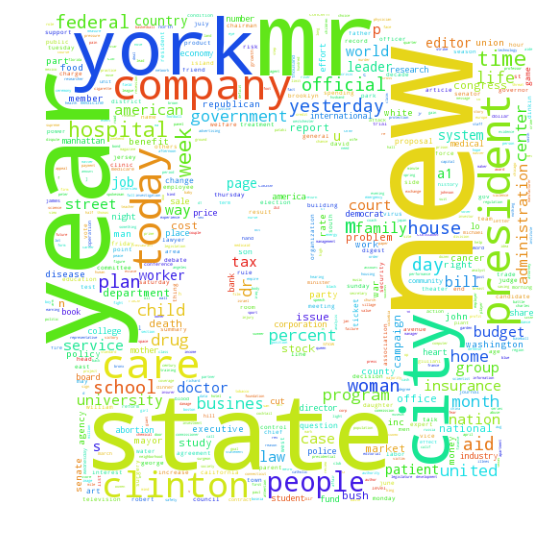

In [172]:
wc.generate(document1991)

plt.imshow(wc)
plt.axis("off")
plt.figure()
plt.show()

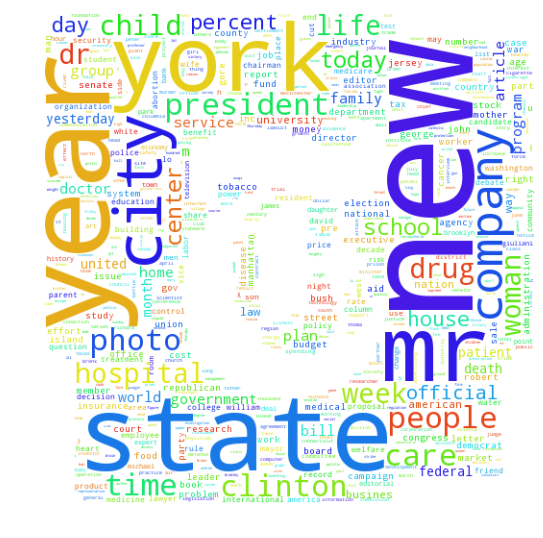

In [173]:
wc.generate(document1996)

plt.imshow(wc)
plt.axis("off")
plt.figure()
plt.show()

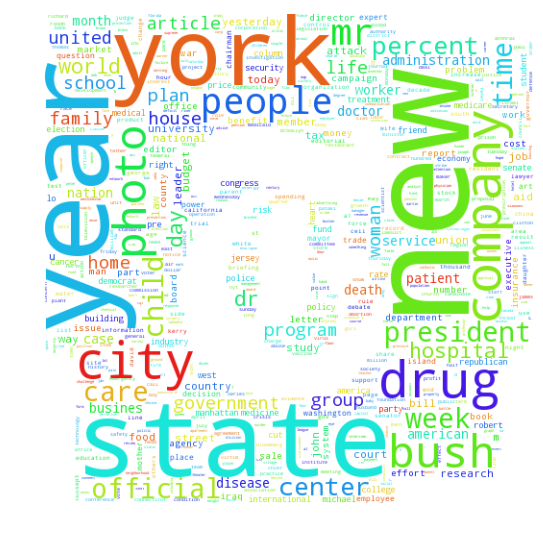

In [174]:
wc.generate(document2001)

plt.imshow(wc)
plt.axis("off")
plt.figure()
plt.show()

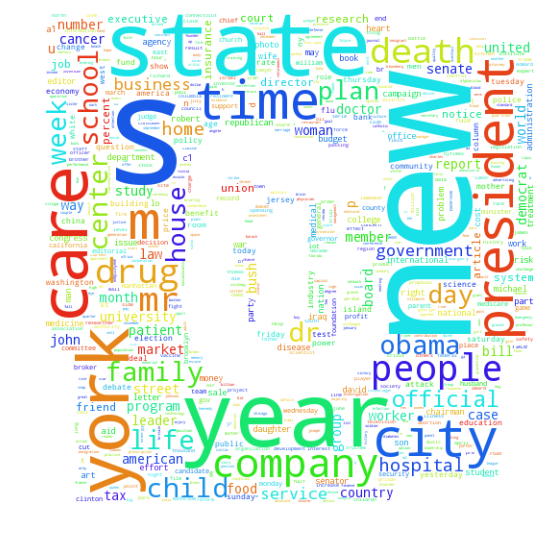

In [175]:
wc.generate(document2006)

plt.imshow(wc)
plt.axis("off")
plt.figure()
plt.show()

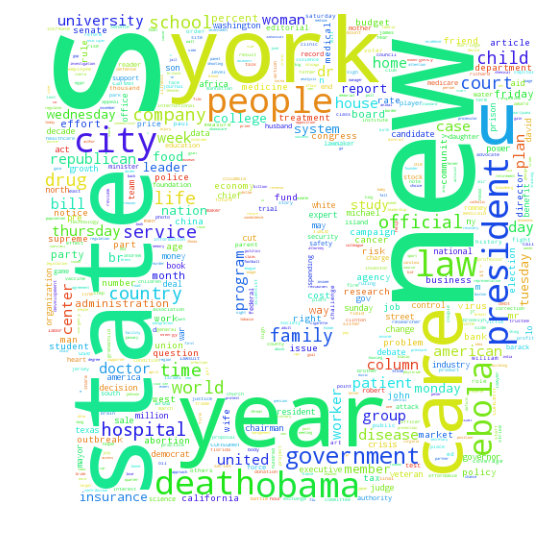

In [176]:
wc.generate(document2011)

plt.imshow(wc)
plt.axis("off")
plt.figure()
plt.show()

In [ ]:
#your code here
#years = [document1966,document1971,document1976,document1981,document1986,document1991,document1996,document2001,document2006,document2011]
#fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize = (15, 25))
#for ax, year in zip(axes.ravel(), years):
#    wc.generate(year)
#    ax.imshow(wc)
#    ax.set_title(year)
#plt.tight_layout()

### pyLDAvis

In [187]:
import pyLDAvis as vis

In [179]:
documents = parseout1966

In [180]:
from gensim import corpora, models, similarities

In [181]:
dictionary = corpora.Dictionary(documents)

In [182]:
dictionary.filter_extremes(no_below=5,no_above=0.75,keep_n=100000)

In [183]:
dictionary.compactify()

In [184]:
corpus = [dictionary.doc2bow(document) for document in documents]

In [186]:
lda1966 = models.ldamodel.LdaModel(corpus=corpus,id2word=dictionary,chunksize=170,num_topics=35)

In [188]:
lda1966_pd = vis.prepare(lda1966)
vis.display(lda1966_pd)

TypeError: prepare() takes at least 5 arguments (1 given)